## My Goal

* Import Data
* Take The Label from the data
* Take the image name from the data
* visualize random images
* turn to images to numpy array and enlarge the data
* build the model
* visualize the result of model

# Find the direction of dataset
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
print('Libraries Imported')

Libraries Imported


In [2]:
path = '../input/mias-mammography/all-mias/'

an example of image path

../input/mias-mammography/all-mias/mdb001.pgm

## Read Data

In [3]:
print("reading dataframe")
info=pd.read_csv("../input/mias-mammography/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [4]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [5]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [6]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info = info.drop('level_0', axis =1)
info = info.drop('index', axis =1)
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb005,F,CIRC,B,477.0,133.0,30.0
3,mdb010,F,CIRC,B,525.0,425.0,33.0
4,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,M,127.0,505.0,123.0
118,mdb290,D,CIRC,B,337.0,353.0,45.0
119,mdb312,F,MISC,B,240.0,263.0,20.0
120,mdb314,F,MISC,B,518.0,191.0,39.0


In [7]:
# B = 0
# M = 1
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,0,535.0,425.0,197.0
1,mdb002,G,CIRC,0,522.0,280.0,69.0
2,mdb005,F,CIRC,0,477.0,133.0,30.0
3,mdb010,F,CIRC,0,525.0,425.0,33.0
4,mdb012,F,CIRC,0,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,1,127.0,505.0,123.0
118,mdb290,D,CIRC,0,337.0,353.0,45.0
119,mdb312,F,MISC,0,240.0,263.0,20.0
120,mdb314,F,MISC,0,518.0,191.0,39.0


In [8]:

label = info.SEVERITY
label = np.array(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

## Turning our outputs B-M to 1-0

# Turning our outputs B-M to 1-0
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [9]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [10]:
img_name = np.array(img_name)

In [11]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


Text(0.5, 1.0, '0')

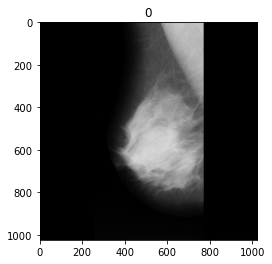

In [61]:
plt.imshow(cv2.imread(img_name[0]))
plt.title(label[0])

## view image random images

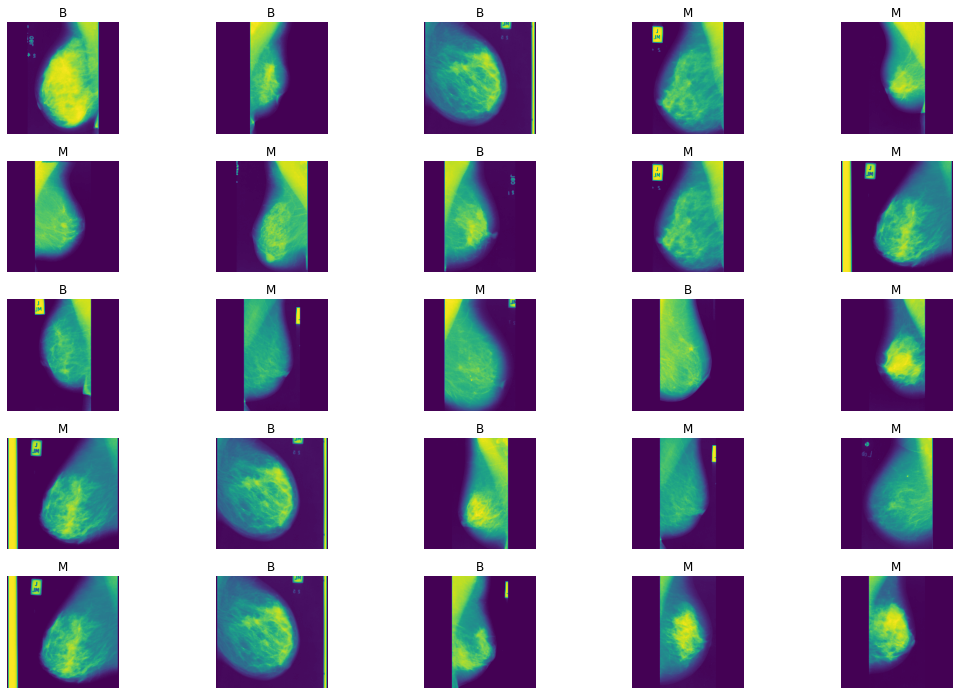

In [62]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

view_25_random_image()

## read Images and labels. and augmentation of images

In [63]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(0, 360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            last_label.append(label[i])
            
            #if label[i] == 1:
            #    last_label.append(1)
            #else:
            #    last_label.append(0)


In [68]:
last_label = np.array(last_label)
last_label

array([0, 0, 0, ..., 0, 0, 0])

## split train and test set

In [69]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.25, random_state = 42)

In [70]:
len(x_train),len(x_test),len(y_train),len(y_test)

(32940, 10980, 32940, 10980)

In [71]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [72]:
x_train.shape

(32940, 224, 224)

In [73]:
x_test.shape

(10980, 224, 224)

In [74]:
x_train = np.reshape(x_train, (32940,224, 224, 1)) # 1 for gray scale
x_test = np.reshape(x_test, (10980,224, 224,1))

## Build a Model

In [75]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    #model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [76]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)       

## Define Callbacks

In [77]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [78]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop])



Epoch 1/100
412/412 [==============================] - 20s 48ms/step - loss: 0.8154 - accuracy: 0.5459 - val_loss: 0.6490 - val_accuracy: 0.6058
Epoch 2/100
412/412 [==============================] - 19s 47ms/step - loss: 0.6313 - accuracy: 0.6272 - val_loss: 0.5261 - val_accuracy: 0.7178
Epoch 3/100
412/412 [==============================] - 19s 46ms/step - loss: 0.4917 - accuracy: 0.7409 - val_loss: 0.4606 - val_accuracy: 0.7732
Epoch 4/100
412/412 [==============================] - 19s 47ms/step - loss: 0.3442 - accuracy: 0.8375 - val_loss: 0.2830 - val_accuracy: 0.8714
Epoch 5/100
412/412 [==============================] - 19s 46ms/step - loss: 0.2110 - accuracy: 0.9084 - val_loss: 0.2148 - val_accuracy: 0.9127
Epoch 6/100
412/412 [==============================] - 19s 47ms/step - loss: 0.1477 - accuracy: 0.9385 - val_loss: 0.1231 - val_accuracy: 0.9472
Epoch 7/100
412/412 [==============================] - 19s 47ms/step - loss: 0.1163 - accuracy: 0.9524 - val_loss: 0.1474 - val_ac

In [79]:
y_test = np.array(y_test)
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

344/344 [==============================] - 3s 8ms/step - loss: 0.1207 - accuracy: 0.9501
Test_loss_value = 0.12071606516838074
test_accuracy = 0.9500910639762878
[[0.99997103]
 [0.99999964]
 [0.9999852 ]
 ...
 [0.7425748 ]
 [1.        ]
 [0.99904114]]


## Let's Visualize our result

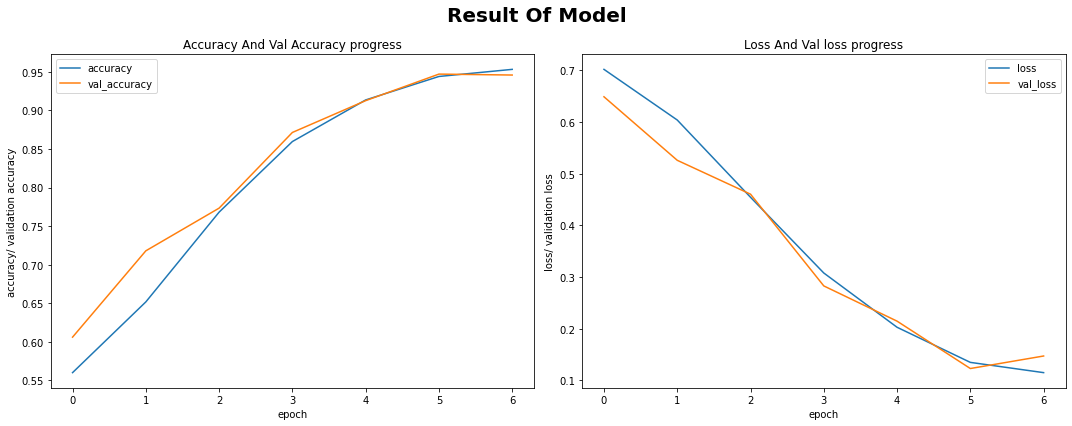

In [80]:

def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [81]:
y_pred=model.predict(x_test)

In [82]:
y_pred.shape

(10980, 1)

In [83]:
len(last_label)

43920

In [90]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
y_pred

array([[0.99997103],
       [0.99999964],
       [0.9999852 ],
       ...,
       [0.7425748 ],
       [1.        ],
       [0.99904114]], dtype=float32)

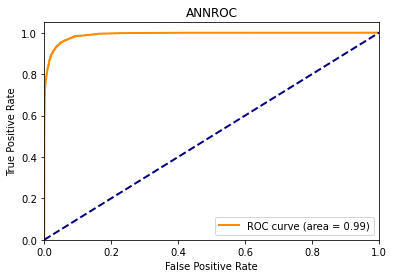

In [100]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#roc plot for specific class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANNROC')
plt.legend(loc="lower right")
plt.show()